In [385]:
import numpy as np 
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm 
import random 

from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

In [386]:
env = gym.make('CartPole-v1', render_mode = 'rgb_array').env

In [387]:
alpha = 0.1
gamma = 0.95 

obs = [30, 30, 50, 50]
window = np.array([0.25, 0.25, 0.01, 0.1]) 

In [388]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

## Q Learning Cart Pole

In [389]:
class Agent: 
    
    def __init__(self, env, alpha, gamma):
        
        self.alpha = alpha 
        self.gamma = gamma 
        self.env   = env 
        
        self.Q = np.random.uniform(low = 0, high= 1,size= obs + [env.action_space.n])
        pass
    
    def get_discrete_state(self,state):
        
        discrete_state = state/window + np.array([15,10,1,10])
        return tuple(discrete_state.astype(int))
    # Discrete STATES only 
    def action(self, state):
        return np.argmax(self.Q[state]) 

    def QUpdate(self, state, action, next_state, reward):
        index = state + (action,)
        # Q learning equation update
        self.Q[index] = self.Q[index] + \
                                self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[index])
    
    
    def train(self, epoch = 100000, epsilon = 0.1):
        
        rewards = []
        epoches = []
        for i in tqdm(range(epoch)):
            state = env.reset()[0]
            epochs, reward_total = 0, 0
            done = False
            
            while not done: 
                if random.uniform(0,1) <= epsilon:
                    action = env.action_space.sample()
                else: 
                    ds = self.get_discrete_state(state) 
                    action = self.action(ds) 
                
            
                ds = self.get_discrete_state(state) 
                next_state, reward, done, info, more_info = env.step(action)
                reward_total += reward
                ns = self.get_discrete_state(next_state)
                
                done = done or info 
                
               
                self.QUpdate(ds, action, ns, reward) 

                state = next_state
                epochs += 1
            
            epoches.append(epochs)
            rewards.append(reward_total)

        print("Average rewards: ", np.mean(rewards))
        return rewards
            
        
            
    def simulateRun(self):
        state = env.reset()[0]
        total_reward = 0
        
        done = False 
        while not done: 
            ds = self.get_discrete_state(state) 
            action = self.action(ds)
    
            next_state, reward, done, info , more_info = env.step(action)
            
            done = done or info 
            
            if not done: 
                ns = self.get_discrete_state(next_state) 
                self.QUpdate(ds, action, ns, reward) 
            
            total_reward += reward
            state = next_state 
        
        print("Reward earned: ", total_reward)
        
        return 
        
            
    
    
    

In [390]:
agent = Agent(alpha = alpha, gamma = gamma, env = env)

In [391]:
rewards = agent.train()

100%|██████████| 100000/100000 [43:35<00:00, 38.24it/s] 

Average rewards:  587.3707


In [392]:
agent.simulateRun()

Reward earned:  6597.0


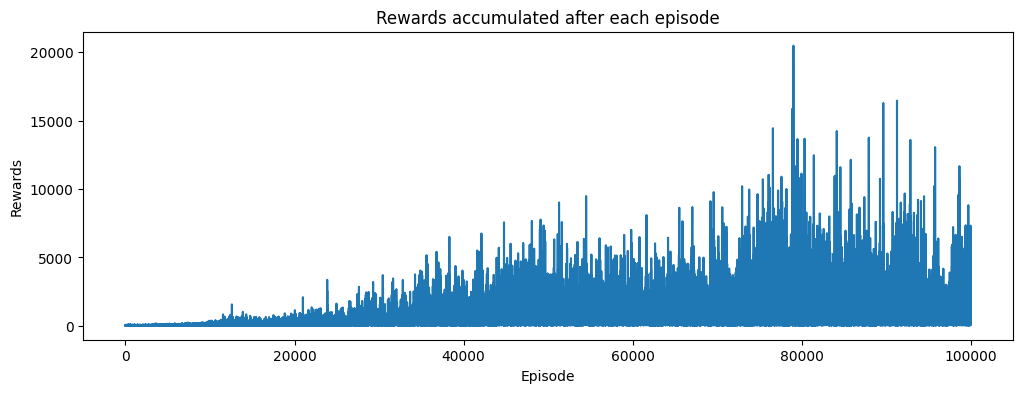

In [393]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards accumulated after each episode")
ax.set_ylabel('Rewards')
ax.set_xlabel('Episode')     
pd.Series(rewards).plot(kind='line')
plt.show()

### Remarks:
The rewards are not constantly increasing as expected. The initial state being random, the agent seems to learn about the system better as the time progresses. From an average of around 20 in the first 5000 steps, it has risen to around ~172 in the 40,000th stage and ending at 587, showing drastic learning improvement. The reward earned during simulation was 6597, showing the power of Q learning even for the continuous case.


The agent's performance is however, prone to the hyperparameters, namely alpha and gamma. Alpha is the step size, and gamma is the discount factor